# Pre-Processing Stage

Below I completed the following pre-processing steps:

*Created Target Variable (H Spread Outcome) - Did the home team win, lose, tie the spread?
*Ran Correlation with Actual Home Score Values to determine the most correlated variables to use
*Filtered the variables down to only the most correlated (above .25 correlation score)
*Double checked the data to determine the amount of outliers for each column of data
*Double checked the game distribution between teams (Home games and Away game matchups) to ensure even distribution
*Dropped columns that may overcomplicate the model (Team name, Year, Date)
*Ensured all final data was available at the start of each game
*Setup Train_Test_Split in prepartion to start modeling. 

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
!pip install pydotplus 
import pydotplus 
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

# Dataset Overview / Remove Null Values 

In [2]:
df2 = pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Upcoming_Final_Game_df.xlsx')

In [3]:
df2.shape

(977, 1593)

# Row 0 is the Georgia_Alabama Championship Game and will be used to test model once developed - thus no score entered. 

In [4]:
df2.head()

,Date,Year,Home Team,Home Team Ranking_x,Away Team,Away Team Ranking_x,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,...,Previous H&A Under Odds_Away_Team,Rolling 5 Past H&A Push Odds_Away_Team,Rolling 5 Past H&A Push Odds Avg_Away_Team,Rolling 5 Past H&A Push Odds Max_Away_Team,Rolling 5 Past H&A Push Odds Min_Away_Team,Rolling 3 Past H&A Push Odds_Away_Team,Rolling 3 Past H&A Push Oddss Avg_Away_Team,Rolling 3 Past H&A Push OddsMax_Away_Team,Rolling 3 Past H&A Push Odds Min_Away_Team,Previous H&A Push Odds_Away_Team
0,2022-01-10,2022,Georgia,3,Alabama,1,-2.5,2.5,52.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-12-04,2021,Alabama,3,Georgia,1,6.5,-6.5,49.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-11-27,2021,LSU,99,Texas A&M,15,6.5,-6.5,27.0,27.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-11-27,2021,Auburn,99,Alabama,3,19.5,-19.5,55.5,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-11-27,2021,Vanderbilt,99,Tennessee,99,31.5,-31.5,63.5,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df2.describe()

,Year,Home Team Ranking_x,Away Team Ranking_x,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,Away Score_x_x,Rolling 5 Past Away Score,Rolling 5 Past Away Score Avg,...,Previous H&A Under Odds_Away_Team,Rolling 5 Past H&A Push Odds_Away_Team,Rolling 5 Past H&A Push Odds Avg_Away_Team,Rolling 5 Past H&A Push Odds Max_Away_Team,Rolling 5 Past H&A Push Odds Min_Away_Team,Rolling 3 Past H&A Push Odds_Away_Team,Rolling 3 Past H&A Push Oddss Avg_Away_Team,Rolling 3 Past H&A Push OddsMax_Away_Team,Rolling 3 Past H&A Push Odds Min_Away_Team,Previous H&A Push Odds_Away_Team
count,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,976.000000,976.000000,907.000000,907.000000,...,970.000000,942.000000,942.000000,942.000000,942.0,956.000000,956.000000,956.000000,956.0,970.000000
mean,2012.903787,58.841351,57.990788,-2.826510,2.826510,51.393040,26.869877,24.196721,120.943771,24.188754,...,0.528866,0.055202,0.011040,0.055202,0.0,0.031381,0.010460,0.031381,0.0,0.008247
std,5.187959,44.375891,44.404771,13.250883,13.250883,8.025355,13.421241,13.896771,42.124725,8.424945,...,0.499424,0.228495,0.045699,0.228495,0.0,0.174436,0.058145,0.174436,0.0,0.090487
min,2004.000000,1.000000,1.000000,-41.500000,-36.000000,27.000000,0.000000,0.000000,28.000000,5.600000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,2008.000000,11.000000,11.000000,-12.500000,-6.500000,45.500000,17.000000,14.000000,92.000000,18.400000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
50%,2013.000000,99.000000,99.000000,-3.000000,3.000000,50.500000,26.000000,23.000000,117.000000,23.400000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
75%,2017.000000,99.000000,99.000000,6.500000,12.500000,56.000000,37.000000,34.000000,147.000000,29.400000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
max,2022.000000,99.000000,99.000000,36.000000,41.500000,82.500000,74.000000,72.000000,278.000000,55.600000,...,1.000000,1.000000,0.200000,1.000000,0.0,1.000000,0.333333,1.000000,0.0,1.000000


In [6]:
Prediction_Game = df2.loc[0]

In [7]:
Prediction_Game

Date                                           2022-01-10 00:00:00
Year                                                          2022
Home Team                                                  Georgia
Home Team Ranking_x                                              3
Away Team                                                  Alabama
                                                      ...         
Rolling 3 Past H&A Push Odds_Away_Team                         0.0
Rolling 3 Past H&A Push Oddss Avg_Away_Team                    0.0
Rolling 3 Past H&A Push OddsMax_Away_Team                      0.0
Rolling 3 Past H&A Push Odds Min_Away_Team                     0.0
Previous H&A Push Odds_Away_Team                               0.0
Name: 0, Length: 1593, dtype: object

In [8]:
df3= df2[1:]

In [9]:
df3.shape

(976, 1593)

# Created Target Variable

In [10]:
df3['H Spread Outcome'] = df3.apply(lambda x: 'H_Spread_W' if (x['Home Score_x_x'] + x['Home Team Spread_x']) > x['Away Score_x_x'] 
                                  else ('H_Spread_L' if (x['Home Score_x_x'] + x['Home Team Spread_x']) < x['Away Score_x_x']
                                  else 'H_Spread_Push' if x['Home Score_x_x'] + x['Home Team Spread_x'] == x['Away Score_x_x']
                                  else ""
                                       
                                       
                                       
                                       ),axis=1) 

<ipython-input-10-f375fe046edc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['H Spread Outcome'] = df3.apply(lambda x: 'H_Spread_W' if (x['Home Score_x_x'] + x['Home Team Spread_x']) > x['Away Score_x_x']


In [11]:
df3['H Spread Outcome'].value_counts()

H_Spread_L       484
H_Spread_W       464
H_Spread_Push     28
Name: H Spread Outcome, dtype: int64

In [12]:
484/976 #Home Spread Loss %

0.4959016393442623

In [13]:
464/976 #Home Spread Win %

0.47540983606557374

In [14]:
28/976 #Home Spread Push(tie) %

0.028688524590163935

# Correlation Tests

In [15]:
# As the home and away team scores of the game determine whether or not the home team wins or losses the spread , I ran a correlation test to determine which variables are most correlated with the scores - which will be used in the final model. 



In [16]:
df3.dtypes

Date                                           datetime64[ns]
Year                                                    int64
Home Team                                              object
Home Team Ranking_x                                     int64
Away Team                                              object
                                                    ...      
Rolling 3 Past H&A Push Oddss Avg_Away_Team           float64
Rolling 3 Past H&A Push OddsMax_Away_Team             float64
Rolling 3 Past H&A Push Odds Min_Away_Team            float64
Previous H&A Push Odds_Away_Team                      float64
H Spread Outcome                                       object
Length: 1594, dtype: object

In [17]:
columns_list=df3.columns


In [18]:
Prediction_Variable = df3['Home Score_x_x']
Home_High_Corr_Values = []

In [19]:
for i in columns_list:
     if df3[i].dtypes == 'float64':
        corr = df3[i].corr(Prediction_Variable) 
        print(i,":",corr)
        if corr > .3:
            Home_High_Corr_Values.append(i)
        if corr < -.3:
            Home_High_Corr_Values.append(i)

Home Team Spread_x : -0.4705450569905662
Away Team Spread_x : 0.4705450569905662
Total_x : 0.3223280984872463
Home Score_x_x : 1.0
Away Score_x_x : -0.06515300572081069
Rolling 5 Past Away Score : -0.10797820700921772
Rolling 5 Past Away Score Avg : -0.10797820700921767
Rolling 5 Past Away Score Max : -0.05625579841822005
Rolling 5 Past Away Score Min : -0.08960629256777507
Rolling 3 Past Away Score : -0.09416260693057879
Rolling 3 Past Away Score Avg : -0.09416260693057875
Rolling 3 Past Away Score Max : -0.055792149105279285
Rolling 3 Past Away Score Min : -0.07453356827482498
Past Away Score : -0.07097380100304561
Rolling 5 Past Away HI Pass yrds : 0.06730476047881796
Rolling 5 Past Away HI Pass yrds Avg : 0.06730476047881793
Rolling 5 Past Away HI Pass yrds Max : 0.10315211853874473
Rolling 5 Past Away HI Pass yrds Min : 0.024423690098601042
Rolling 3 Past Away HI Pass yrds : 0.08224198660280532
Rolling 3 Past Away HI Pass yrds Avg : 0.08224198660280536
Rolling 3 Past Away HI Pass 

Rolling 3 Past Away 4th Down Conversion % Max : -0.011298697209739124
Rolling 3 Past Away 4th Down Conversion % Min : 0.03578662731904349
Previous Away 4th Down Conversions % : -0.040923694915890985
Rolling 5 Past Away Completions : 0.09748085396796707
Rolling 5 Past Away Completions Avg : 0.09748085396796702
Rolling 5 Past Away Completions Max : 0.14566363529392537
Rolling 5 Past Away Completions Min : 0.02801970925047071
Rolling 3 Past Away Completions : 0.11721176793086197
Rolling 3 Past Away Completions Avg : 0.11721176793086203
Rolling 3 Past Away Completions Max : 0.15616855386613374
Rolling 3 Past Away Completions Min : 0.0583277912874245
Previous Away Completions : 0.051121177494087365
Rolling 5 Past Away Completion Attempts : 0.13818706199405964
Rolling 5 Past Away Completion Attempts Avg : 0.13818706199405947
Rolling 5 Past Away Completion Attempts Max : 0.1281417608351866
Rolling 5 Past Away Completion Attempts Min : 0.0886028162736546
Rolling 3 Past Away Completion Attempts

Rolling 5 Past Away ATS Loss Avg : 0.09632760193554377
Rolling 5 Past Away ATS Loss Max : 0.019790220908507745
Rolling 5 Past Away ATS Loss Min : -0.0057075161543136375
Rolling 3 Past Away ATS Loss : 0.12357342426063767
Rolling 3 Past Away ATS Loss Avg : 0.1235734242606376
Rolling 3 Past Away ATS Loss Max : 0.107033624349325
Rolling 3 Past Away ATS Loss Min : 0.03886982427536769
Previous Away ATS Loss : 0.08040975971420933
Rolling 5 Past Away ATS Push : 0.002955300635694697
Rolling 5 Past Away ATS Push Avg : 0.0029553006356946836
Rolling 5 Past Away ATS Push Max : 0.008097246550130745
Rolling 5 Past Away ATS Push Min : nan
Rolling 3 Past Away ATS Push : -0.018150754545178917
Rolling 3 Past Away ATS Push Avg : -0.018150754545178914
Rolling 3 Past Away ATS Push Max : -0.018513193754729713
Rolling 3 Past Away ATS Push Min : nan
Previous Away ATS Push : -0.009241873184490525
Rolling 5 Past Away Over Odds : -0.03291009078675364
Rolling 5 Past Away Over Odds Avg : -0.03291009078675372
Rollin

Rolling 3 Past Home Yards per Pass Avg : 0.27929815181732004
Rolling 3 Past Home Yards per Pass Max : 0.23700449418314648
Rolling 3 Past Home Yards per Pass Min : 0.2254625459488767
Previous Home Yards per Pass : 0.20877130258495746
Rolling 5 Past Home Rushing : 0.12496018903436165
Rolling 5 Past Home Rushing Avg : 0.12496018903436168
Rolling 5 Past Home Rushing Max : 0.08231304860462918
Rolling 5 Past Home Rushing Min : 0.13359406895938797
Rolling 3 Past Home Rushing : 0.13547933130366718
Rolling 3 Past Home Rushing Avg : 0.13547933130366716
Rolling 3 Past Home Rushing Max : 0.09375349551935601
Rolling 3 Past Home Rushing Min : 0.14942025767717765
Previous Home Rushing : 0.11244208709812124
Rolling 5 Past Home Rushing Attempts : -0.09770917439262378
Rolling 5 Past Home Rushing Attempts Avg : -0.09770917439262393
Rolling 5 Past Home Rushing Attempts Max : -0.10055237617340775
Rolling 5 Past Home Rushing Attempts Min : -0.07351716163865851
Rolling 3 Past Home Rushing Attempts : -0.07955

Rolling 3 Past H&A HI Pass yrds_Home_Team : 0.22979708382691677
Rolling 3 Past H&A HI Pass yrds Avg_Home_Team : 0.22979708382691677
Rolling 3 Past H&A HI Pass yrds Max_Home_Team : 0.22158680280830878
Rolling 3 Past H&A HI Pass yrds Min_Home_Team : 0.19711186537852435
Previous H&A HI Pass yrds_Home_Team : 0.18439911052331132
Rolling 5 Past H&A HI Rush yrds_Home_Team : 0.09724212020322467
Rolling 5 Past H&A HI Rush yrds Avg_Home_Team : 0.09724212020322463
Rolling 5 Past H&A HI Rush yrds Max_Home_Team : 0.052191897281508325
Rolling 5 Past H&A HI Rush yrds Min_Home_Team : 0.09946140504227095
Rolling 3 Past H&A HI Rush yrds_Home_Team : 0.06690017256157757
Rolling 3 Past H&A HI Rush yrds Avg_Home_Team : 0.06690017256157761
Rolling 3 Past H&A HI Rush yrds Max_Home_Team : 0.03631643963910316
Rolling 3 Past H&A HI Rush yrds Min_Home_Team : 0.08519839389383695
Previous H&A HI Rush yrds_Home_Team : 0.056547559855541614
Rolling 5 Past H&A HI REC yrds_Home_Team : 0.2461680226819471
Rolling 5 Past H

Rolling 3 Past H&A 4th Down Conversion % Min_Home_Team : 0.0016093240036548241
Previous H&A 4th Down Conversions %_Home_Team : -0.0004272456042626853
Rolling 5 Past H&A Completions_Home_Team : 0.1554470566026573
Rolling 5 Past H&A Completions Avg_Home_Team : 0.1554470566026574
Rolling 5 Past H&A Completions Max_Home_Team : 0.10614672137901618
Rolling 5 Past H&A Completions Min_Home_Team : 0.17819949801310195
Rolling 3 Past H&A Completions_Home_Team : 0.15274186418112204
Rolling 3 Past H&A Completions Avg_Home_Team : 0.15274186418112193
Rolling 3 Past H&A Completions Max_Home_Team : 0.12967733433993592
Rolling 3 Past H&A Completions Min_Home_Team : 0.15194263921168386
Previous H&A Completions_Home_Team : 0.12494850054178974
Rolling 5 Past H&A Completion Attempts_Home_Team : 0.041362773031519
Rolling 5 Past H&A Completion Attempts Avg_Home_Team : 0.04136277303151902
Rolling 5 Past H&A Completion Attempts Max_Home_Team : 0.01936247644541286
Rolling 5 Past H&A Completion Attempts Min_Home_

Rolling 3 Past H&A Ranking Max_Home_Team : -0.2624927388003305
Rolling 3 Past H&A Ranking Min_Home_Team : -0.27332815400343197
Previous H&A Ranking_Home_Team : -0.2817341952474869
Rolling 5 Past H&A ATS Win_Home_Team : 0.04064273195212627
Rolling 5 Past H&A ATS Win Avg_Home_Team : 0.040642731952126254
Rolling 5 Past H&A ATS Win Max_Home_Team : 0.03856232578838675
Rolling 5 Past H&A ATS Win Min_Home_Team : 0.009665167442513724
Rolling 3 Past H&A ATS Win_Home_Team : 0.06004777047686913
Rolling 3 Past H&A ATS Win Avg_Home_Team : 0.060047770476869114
Rolling 3 Past H&A ATS Win Max_Home_Team : 0.0733277578311328
Rolling 3 Past H&A ATS Win Min_Home_Team : 0.03970484994727551
Previous H&A ATS Win_Home_Team : -0.0025100516839469036
Rolling 5 Past H&A ATS Loss_Home_Team : -0.03990608704557972
Rolling 5 Past H&A ATS Loss Avg_Home_Team : -0.03990608704557984
Rolling 5 Past H&A ATS Loss Max_Home_Team : -0.0027752287958372757
Rolling 5 Past H&A ATS Loss Min_Home_Team : -0.05919230897687661
Rolling 

Rolling 5 Past H&A Passing Max_Away_Team : 0.07411582325167548
Rolling 5 Past H&A Passing Min_Away_Team : 0.04003039440377597
Rolling 3 Past H&A Passing_Away_Team : 0.04225493631366825
Rolling 3 Past H&A Passing Avg_Away_Team : 0.042254936313668286
Rolling 3 Past H&A Passing Max_Away_Team : 0.03829466476858401
Rolling 3 Past H&A Passing Min_Away_Team : 0.037104228341031074
Previous H&A Passing_Away_Team : 0.02520277889424112
Rolling 5 Past H&A Yards per Pass_Away_Team : -0.08239669366734091
Rolling 5 Past H&A Yards per Pass Avg_Away_Team : -0.08239669366734097
Rolling 5 Past H&A Yards per Pass Max_Away_Team : -0.10014567549403301
Rolling 5 Past H&A Yards per Pass Min_Away_Team : -0.030667525115163716
Rolling 3 Past H&A Yards per Pass_Away_Team : -0.07717557341116424
Rolling 3 Past H&A Yards per Pass Avg_Away_Team : -0.07717557341116424
Rolling 3 Past H&A Yards per Pass Max_Away_Team : -0.09078388999116609
Rolling 3 Past H&A Yards per Pass Min_Away_Team : -0.04271240306669348
Previous H

Rolling 5 Past H&A Push Odds Min_Away_Team : nan
Rolling 3 Past H&A Push Odds_Away_Team : -0.06983294572029264
Rolling 3 Past H&A Push Oddss Avg_Away_Team : -0.0698329457202926
Rolling 3 Past H&A Push OddsMax_Away_Team : -0.06983294572029264
Rolling 3 Past H&A Push Odds Min_Away_Team : nan
Previous H&A Push Odds_Away_Team : -0.046300396867510696


In [20]:
Home_High_Corr_Values

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Home Score_x_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team']

In [21]:
Home_High_Corr_Values.remove('Rolling 5 Past H&A Score_Home_Team')
Home_High_Corr_Values.remove('Rolling 5 Past H&A 1st Downs_Home_Team')
Home_High_Corr_Values.remove('Rolling 5 Past H&A Total Yards_Home_Team')
Home_High_Corr_Values.remove('Rolling 5 Past H&A Yards per Pass_Home_Team')
Home_High_Corr_Values.remove('Rolling 5 Past H&A Spread_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A HI REC yrds Avg_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Conf T Wins_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Completion % Avg_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Q1 Score Avg_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Ranking Avg_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Season T Losses_Away_Team')

In [22]:
Home_High_Corr_Values

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Home Score_x_x',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team',
 'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
 'Rolling 5 Past H&A Conf T Wins_Home_Team',
 'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
 'Rolling 5 Past H&A Completion % Avg_Home_Team',
 'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
 'Rolling 5 Past H&A Ranking Avg_Home_Team',
 'Rolling 5 Past H&A Season T Losses_Away_Team']

In [23]:
Home_High_Corr_Values.append('Away Score_x_x')
Home_High_Corr_Values.append('Rolling 5 Past H&A Score Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A 1st Downs Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Total Yards Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Yards per Pass Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Spread Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Spread Min_Away_Team')

Home_High_Corr_Values.append('Rolling 5 Past H&A HI REC yrds Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Conf T Wins_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Completion % Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Q1 Score Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Ranking Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Season T Losses_Home_Team')

Home_High_Corr_Values.append('Home Team Ranking_x')
Home_High_Corr_Values.append('Away Team Ranking_x')
Home_High_Corr_Values.append('Previous H&A Ranking_Home_Team')
Home_High_Corr_Values.append('Previous H&A Ranking_Away_Team')
Home_High_Corr_Values.append('H Spread Outcome')
Home_High_Corr_Values.append('Date')
Home_High_Corr_Values.append('Home Team')
Home_High_Corr_Values.append('Away Team')
Home_High_Corr_Values.append('Year')

In [725]:
df4 = df3[Home_High_Corr_Values]

In [25]:
df4.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass Avg_Home_Team,Rolling 5 Past H&A Spread Avg_Home_Team,Rolling 5 Past H&A Spread Min_Home_Team,...,Rolling 5 Past H&A Season T Losses_Home_Team,Home Team Ranking_x,Away Team Ranking_x,Previous H&A Ranking_Home_Team,Previous H&A Ranking_Away_Team,H Spread Outcome,Date,Home Team,Away Team,Year
1,6.5,-6.5,49.0,41.0,37.4,23.6,496.8,9.86,-22.3,-29.0,...,5.0,3,1,3.0,1.0,H_Spread_W,2021-12-04,Alabama,Georgia,2021
2,6.5,-6.5,27.0,27.0,22.8,20.0,358.2,6.18,11.1,2.0,...,21.0,99,15,99.0,11.0,H_Spread_W,2021-11-27,LSU,Texas A&M,2021
3,19.5,-19.5,55.5,22.0,24.6,22.2,399.6,7.70,-1.3,-7.0,...,16.0,99,3,99.0,1.0,H_Spread_W,2021-11-27,Auburn,Alabama,2021
4,31.5,-31.5,63.5,21.0,17.6,16.2,313.8,6.28,22.5,16.0,...,35.0,99,99,99.0,99.0,H_Spread_W,2021-11-27,Vanderbilt,Tennessee,2021
5,-14.5,14.5,63.0,34.0,31.2,25.0,456.0,8.08,2.8,-4.5,...,15.0,25,99,21.0,99.0,H_Spread_W,2021-11-26,Arkansas,Missouri,2021


In [26]:
df4.columns

Index(['Home Team Spread_x', 'Away Team Spread_x', 'Total_x', 'Home Score_x_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team', 'Away Score_x_x',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg

In [27]:
df4.shape

(976, 40)

In [28]:
df4.isnull().sum()

Home Team Spread_x                                         0
Away Team Spread_x                                         0
Total_x                                                    0
Home Score_x_x                                             0
Rolling 5 Past H&A Score Avg_Home_Team                    35
Rolling 5 Past H&A 1st Downs Avg_Home_Team                41
Rolling 5 Past H&A Total Yards Avg_Home_Team              41
Rolling 5 Past H&A Yards per Pass Avg_Home_Team           41
Rolling 5 Past H&A Spread Avg_Home_Team                   35
Rolling 5 Past H&A Spread Min_Home_Team                   35
Rolling 5 Past H&A HI REC yrds Avg_Home_Team              35
Rolling 5 Past H&A Conf T Wins_Home_Team                  35
Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team    41
Rolling 5 Past H&A Completion % Avg_Home_Team             41
Rolling 5 Past H&A Q1 Score Avg_Home_Team                 35
Rolling 5 Past H&A Ranking Avg_Home_Team                  35
Rolling 5 Past H&A Seaso

In [29]:
#Removed all rows with null values 

In [726]:
df4.dropna(inplace=True)

<ipython-input-726-245837dc34b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.dropna(inplace=True)


In [31]:
df4.shape

(928, 40)

In [32]:
#Removing rows with null values took the dataset from 976 rows to 928. 

In [33]:
df4.isnull().sum().max()

0

In [34]:
df4['H Spread Outcome'].value_counts()

H_Spread_L       459
H_Spread_W       442
H_Spread_Push     27
Name: H Spread Outcome, dtype: int64

In [35]:
print('Home Spread Loss %: ',459/928 , '\n' 'Home Spread Win %: ', 442/928 , '\n' 'Home Spread Push(tie) %: ', 27/928)

Home Spread Loss %:  0.49461206896551724 
Home Spread Win %:  0.47629310344827586 
Home Spread Push(tie) %:  0.029094827586206896


# Checked data to identify how many rows of data were not outliers to ensure quality 

In [36]:
Describe_df = pd.DataFrame(df4.describe().T)

In [37]:
Describe_df['# Rows <> upper/lower'] = 0
Describe_df['Upper'] = 0
Describe_df['Lower'] = 0

In [38]:

for i in df4.columns:
    if df4[i].dtypes == 'float64':
        mean = df4[i].mean()
        std =df4[i].std()
        lower = mean + (-3 *std)
        upper = mean + (3*std)
        count = df4[(df3[i] > lower) & (df4[i] < upper)]['Home Team'].count()
        #print('Feature:',i, "\n"' Rows: ', count,' Mean: ', mean,"\n" ' Std: ', std, ' Upper: ', upper,' Lower: ', lower, )
        Describe_df['# Rows <> upper/lower'].loc[i] = count
        Describe_df['Upper'].loc[i] = upper
        Describe_df['Lower'].loc[i] = lower
        

<ipython-input-38-0fc6190579d4>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count = df4[(df3[i] > lower) & (df4[i] < upper)]['Home Team'].count()
<ipython-input-38-0fc6190579d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Describe_df['# Rows <> upper/lower'].loc[i] = count
<ipython-input-38-0fc6190579d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Describe_df['Upper'].loc[i] = upper
<ipython-input-38-0fc6190579d4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

<ipython-input-38-0fc6190579d4>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count = df4[(df3[i] > lower) & (df4[i] < upper)]['Home Team'].count()
<ipython-input-38-0fc6190579d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Describe_df['# Rows <> upper/lower'].loc[i] = count
<ipython-input-38-0fc6190579d4>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count = df4[(df3[i] > lower) & (df4[i] < upper)]['Home Team'].count()
<ipython-input-38-0fc6190579d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Describe_df['# Rows <> upper/lower'].loc[i] = 

In [39]:
#As shown below, we can see that for Home Team Spread_x that there are 928/928 rows within the upper and lower limits (mean +3 std / mean -3*std)

#Overall there are few outliers, which will positively impact the model's performance. 

#(The 0's are due to being non-float-64 inputs, thus ignored in calculation).

In [40]:
Describe_df

,count,mean,std,min,25%,50%,75%,max,# Rows <> upper/lower,Upper,Lower
Home Team Spread_x,928.0,-2.789332,13.285394,-41.500000,-12.500000,-3.000000,6.500000,36.000000,928,37.066849,-42.645513
Away Team Spread_x,928.0,2.789332,13.285394,-36.000000,-6.500000,3.000000,12.500000,41.500000,928,42.645513,-37.066849
Total_x,928.0,51.568966,8.111918,27.000000,45.500000,50.500000,56.500000,82.500000,922,75.904721,27.233210
Home Score_x_x,928.0,26.995690,13.461759,0.000000,17.000000,27.000000,37.000000,74.000000,927,67.380968,-13.389589
Rolling 5 Past H&A Score Avg_Home_Team,928.0,25.568534,8.521880,6.600000,19.800000,24.800000,30.400000,52.200000,926,51.134175,0.002894
Rolling 5 Past H&A 1st Downs Avg_Home_Team,928.0,19.651078,3.543245,9.400000,17.400000,19.400000,22.000000,31.000000,925,30.280812,9.021343
Rolling 5 Past H&A Total Yards Avg_Home_Team,928.0,372.633621,75.668510,191.400000,320.150000,372.000000,422.050000,597.400000,928,599.639151,145.628091
Rolling 5 Past H&A Yards per Pass Avg_Home_Team,928.0,7.223793,1.478296,3.600000,6.240000,7.140000,8.160000,12.860000,924,11.658680,2.788906
Rolling 5 Past H&A Spread Avg_Home_Team,928.0,0.259052,9.646568,-29.500000,-6.200000,0.450000,7.100000,26.100000,926,29.198755,-28.680652
Rolling 5 Past H&A Spread Min_Home_Team,928.0,-11.655711,10.701513,-41.500000,-18.000000,-12.000000,-3.500000,16.500000,928,20.448828,-43.760251


# Double checked the game distribution between teams below to ensure the matchups were evenly distributed

In [41]:
Team_Matchups = pd.DataFrame(columns=df4['Home Team'].unique(),index=df4['Home Team'].unique())

In [42]:
Team_Matchups

,Alabama,LSU,Auburn,Vanderbilt,Arkansas,Mississippi State,South Carolina,Missouri,Ole Miss,Tennessee,Kentucky,Georgia,Texas A&M,Florida
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Auburn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vanderbilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mississippi State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Carolina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Missouri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ole Miss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
Teams=df4['Home Team'].unique()

In [44]:
Teams

array(['Alabama', 'LSU', 'Auburn', 'Vanderbilt', 'Arkansas',
       'Mississippi State', 'South Carolina', 'Missouri', 'Ole Miss',
       'Tennessee', 'Kentucky', 'Georgia', 'Texas A&M', 'Florida'],
      dtype=object)

In [45]:
Teams2=Teams

In [46]:
Row = 0
Column= 0
Start = 0
Stop = 14

In [47]:
while Column < Stop:
        a  = df4[(df4['Home Team'] == Teams[Row]) & (df4['Away Team'] == Teams[Column])]
        Team_Matchups.iloc[Row,Column] = a.shape[0]
        Column = Column + 1

In [48]:
Team_Matchups

,Alabama,LSU,Auburn,Vanderbilt,Arkansas,Mississippi State,South Carolina,Missouri,Ole Miss,Tennessee,Kentucky,Georgia,Texas A&M,Florida
Alabama,0,9,9,2,9,9,1,1,9,8,3,3,5,5
LSU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Auburn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vanderbilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mississippi State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Carolina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Missouri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ole Miss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
Row =1
Column =0
while Column < Stop:
        a  = df4[(df4['Home Team'] == Teams[Row]) & (df4['Away Team'] == Teams[Column])]
        Team_Matchups.iloc[Row,Column] = a.shape[0]
        Column = Column + 1

In [50]:
Row =2
Column =0
while Column < Stop:
        a  = df4[(df4['Home Team'] == Teams[Row]) & (df4['Away Team'] == Teams[Column])]
        Team_Matchups.iloc[Row,Column] = a.shape[0]
        Column = Column + 1

In [51]:
Row =3
Column =0
while Column < Stop:
        a  = df4[(df4['Home Team'] == Teams[Row]) & (df4['Away Team'] == Teams[Column])]
        Team_Matchups.iloc[Row,Column] = a.shape[0]
        Column = Column + 1

In [52]:
Row =4
Column =0
while Column < Stop:
        a  = df4[(df4['Home Team'] == Teams[Row]) & (df4['Away Team'] == Teams[Column])]
        Team_Matchups.iloc[Row,Column] = a.shape[0]
        Column = Column + 1

In [53]:
Row =5
Column =0
while Column < Stop:
        a  = df4[(df4['Home Team'] == Teams[Row]) & (df4['Away Team'] == Teams[Column])]
        Team_Matchups.iloc[Row,Column] = a.shape[0]
        Column = Column + 1

In [54]:
Row =6
Column =0
while Column < Stop:
        a  = df4[(df4['Home Team'] == Teams[Row]) & (df4['Away Team'] == Teams[Column])]
        Team_Matchups.iloc[Row,Column] = a.shape[0]
        Column = Column + 1

In [55]:
Row =7
Column =0
while Column < Stop:
        a  = df4[(df4['Home Team'] == Teams[Row]) & (df4['Away Team'] == Teams[Column])]
        Team_Matchups.iloc[Row,Column] = a.shape[0]
        Column = Column + 1

In [56]:
Row =8
Column =0
while Column < Stop:
        a  = df4[(df4['Home Team'] == Teams[Row]) & (df4['Away Team'] == Teams[Column])]
        Team_Matchups.iloc[Row,Column] = a.shape[0]
        Column = Column + 1

In [57]:
Row =9
Column =0
while Column < Stop:
        a  = df4[(df4['Home Team'] == Teams[Row]) & (df4['Away Team'] == Teams[Column])]
        Team_Matchups.iloc[Row,Column] = a.shape[0]
        Column = Column + 1

In [58]:
Row =10
Column =0
while Column < Stop:
        a  = df4[(df4['Home Team'] == Teams[Row]) & (df4['Away Team'] == Teams[Column])]
        Team_Matchups.iloc[Row,Column] = a.shape[0]
        Column = Column + 1

In [59]:
Row =11
Column =0
while Column < Stop:
        a  = df4[(df4['Home Team'] == Teams[Row]) & (df4['Away Team'] == Teams[Column])]
        Team_Matchups.iloc[Row,Column] = a.shape[0]
        Column = Column + 1

In [60]:
Row =12
Column =0
while Column < Stop:
        a  = df4[(df4['Home Team'] == Teams[Row]) & (df4['Away Team'] == Teams[Column])]
        Team_Matchups.iloc[Row,Column] = a.shape[0]
        Column = Column + 1

In [61]:
Row =13
Column =0
while Column < Stop:
        a  = df4[(df4['Home Team'] == Teams[Row]) & (df4['Away Team'] == Teams[Column])]
        Team_Matchups.iloc[Row,Column] = a.shape[0]
        Column = Column + 1

# Team_Matchups shows the number of Home & Away games btwn each team. Rows  = Home Team , Column = Away Team

In [62]:
#We can see that there are more matchups between some teams, although that is due to how the conference is divided as there are two sub-divisions within the SEC

#e.g. There were 8 machups between Auburn & LSU where Auburn was the Home Team, and 9 where LSU was the home team. 

In [63]:
Team_Matchups

,Alabama,LSU,Auburn,Vanderbilt,Arkansas,Mississippi State,South Carolina,Missouri,Ole Miss,Tennessee,Kentucky,Georgia,Texas A&M,Florida
Alabama,0,9,9,2,9,9,1,1,9,8,3,3,5,5
LSU,9,0,9,1,9,8,3,1,9,3,3,4,5,9
Auburn,9,8,0,2,8,9,3,1,9,4,2,11,5,2
Vanderbilt,2,3,2,0,2,2,8,5,8,9,9,8,1,9
Arkansas,8,9,9,2,0,9,5,4,9,3,2,3,5,2
Mississippi State,9,9,8,3,9,0,3,1,9,2,8,2,5,2
South Carolina,3,1,5,9,5,2,0,5,1,9,8,8,4,9
Missouri,2,1,1,5,4,1,5,0,1,5,5,5,2,5
Ole Miss,8,9,8,8,9,9,3,1,0,2,1,3,6,2
Tennessee,8,3,2,8,2,2,9,5,3,0,8,9,1,8


In [64]:
df4.sample(10)

,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass Avg_Home_Team,Rolling 5 Past H&A Spread Avg_Home_Team,Rolling 5 Past H&A Spread Min_Home_Team,...,Rolling 5 Past H&A Season T Losses_Home_Team,Home Team Ranking_x,Away Team Ranking_x,Previous H&A Ranking_Home_Team,Previous H&A Ranking_Away_Team,H Spread Outcome,Date,Home Team,Away Team,Year
356,-18.0,18.0,41.5,53.0,30.0,21.2,409.8,7.06,-3.3,-17.0,...,19.0,99,99,99.0,99.0,H_Spread_W,2015-11-28,Tennessee,Vanderbilt,2015
176,-13.0,13.0,49.0,34.0,27.0,23.6,428.0,7.56,-5.0,-10.0,...,9.0,9,99,9.0,99.0,H_Spread_W,2019-09-21,Florida,Tennessee,2019
619,2.5,-2.5,61.0,42.0,34.6,20.4,435.2,9.92,-2.0,-20.0,...,9.0,18,14,14.0,99.0,H_Spread_W,2011-10-01,Arkansas,Texas A&M,2011
730,-7.0,7.0,39.5,41.0,29.0,19.8,427.4,9.76,-6.8,-16.5,...,8.0,21,99,10.0,25.0,H_Spread_L,2009-09-12,Georgia,South Carolina,2009
281,3.0,-3.0,45.0,48.0,19.8,17.0,336.0,7.80,2.2,-5.5,...,12.0,99,99,99.0,99.0,H_Spread_W,2017-10-07,South Carolina,Arkansas,2017
416,-5.0,5.0,48.5,21.0,25.4,21.2,392.6,6.84,5.7,-11.0,...,22.0,99,20,99.0,99.0,H_Spread_L,2014-11-22,Tennessee,Missouri,2014
180,26.5,-26.5,59.5,23.0,33.2,18.4,389.6,8.56,0.3,-10.5,...,15.0,99,2,99.0,1.0,H_Spread_W,2019-09-14,South Carolina,Alabama,2019
5,-14.5,14.5,63.0,34.0,31.2,25.0,456.0,8.08,2.8,-4.5,...,15.0,25,99,21.0,99.0,H_Spread_W,2021-11-26,Arkansas,Missouri,2021
27,-25.0,25.0,68.0,52.0,42.4,25.2,490.4,9.20,-16.2,-18.5,...,2.0,4,99,5.0,99.0,H_Spread_W,2021-10-23,Alabama,Tennessee,2021
886,16.5,-16.5,39.5,7.0,10.6,15.0,285.0,6.02,9.5,-10.0,...,22.0,99,4,99.0,5.0,H_Spread_L,2005-11-19,Ole Miss,LSU,2005


# Dropped more columns to avoid over complications given the limited dataa

In [65]:
#decided to drop the home team, away team,Date,year given this is a limited datset already and didn't want to overcomplicate the decision tree 

In [66]:
df4.drop('Home Team',inplace=True,axis=1)
df4.drop('Away Team',inplace=True,axis=1)
df4.drop('Date',inplace=True,axis=1)
df4.drop('Year',inplace=True,axis=1)

<ipython-input-66-4ad045b01259>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop('Home Team',inplace=True,axis=1)
<ipython-input-66-4ad045b01259>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop('Away Team',inplace=True,axis=1)
<ipython-input-66-4ad045b01259>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop('Date',inplace=True,axis=1)
<ipython-input-66-4ad045b01259>:4: SettingWithCopyWarning: 
A value is tryi

In [67]:
df4.columns

Index(['Home Team Spread_x', 'Away Team Spread_x', 'Total_x', 'Home Score_x_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team', 'Away Score_x_x',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg

In [68]:
df4.drop('Away Score_x_x',inplace=True,axis=1)#Dropped actual scores, so only data that would have been available at the start of the game remains
df4.drop('Home Score_x_x',inplace=True,axis=1)

<ipython-input-68-62d564fc7e78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop('Away Score_x_x',inplace=True,axis=1)#Dropped actual scores, so only data that would have been available at the start of the game remains
<ipython-input-68-62d564fc7e78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop('Home Score_x_x',inplace=True,axis=1)


In [69]:
df4.columns

Index(['Home Team Spread_x', 'Away Team Spread_x', 'Total_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
       'Rolling 5 Past 

# Test Train Spit

In [116]:
X = df4.drop('H Spread Outcome',axis=1)
# Create constants for X, so the model knows its bounds
y = df4['H Spread Outcome']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [82]:
X_train.shape

(696, 33)

In [83]:
y_train.shape

(696,)

In [84]:
X_test.shape

(232, 33)

In [85]:
y_test.shape

(232,)

# Modeling

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [87]:
Scaler = StandardScaler()
DT = DecisionTreeClassifier()

In [88]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
y_pred = DT.predict(X_test)

In [92]:
metrics.accuracy_score(y_test, y_pred)

0.5043103448275862

# Parameter Tuning via Gridsearch

In [178]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5,10,15,20,30,40,41,43,45,45,47,50,60],
    'min_samples_split': [2,3,5],
    'min_samples_leaf':[1,3,5,10],
}

In [179]:
DT = DecisionTreeClassifier()

In [180]:
clf = GridSearchCV(DT,parameters,cv=5)
clf.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 41,
                                       43, 45, 45, 47, 50, 60],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'min_samples_split': [2, 3, 5],
                         'splitter': ['best', 'random']})

In [181]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'random'}

In [128]:
best_params = clf.best_params_

In [123]:
y_pred = clf.predict(X)

In [124]:
metrics.accuracy_score(y, y_pred)

0.6853448275862069

In [125]:
y_pred = clf.predict(X_test)

In [126]:
metrics.accuracy_score(y_test, y_pred)

0.6982758620689655

In [289]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],
    'min_samples_split': [2,3,5],
    'min_samples_leaf':[1,3,5,10],
    'max_features': [1,5,10,15,20,25,30]
}

In [290]:
DT = DecisionTreeClassifier()

In [291]:
clf = GridSearchCV(DT,parameters,cv=5)
clf.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26],
                         'max_features': [1, 5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'min_samples_split': [2, 3, 5],
                         'splitter': ['best', 'random']})

In [292]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'splitter': 'random'}

# Decision Tree

In [293]:
X = df4.drop('H Spread Outcome',axis=1)
# Create constants for X, so the model knows its bounds
y = df4['H Spread Outcome']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [299]:
# - achieved 55% DT = DecisionTreeClassifier(criterion = 'gini', max_depth=40, min_samples_leaf= 10, min_samples_split = 5,splitter='random',random_state=1234)
DT = DecisionTreeClassifier(criterion = 'gini', max_depth=40, min_samples_leaf= 10, min_samples_split = 5,splitter='random',random_state=42)


In [300]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=40, min_samples_leaf=10, min_samples_split=5,
                       random_state=42, splitter='random')

In [301]:
y_pred = DT.predict(X_test)

In [302]:
metrics.accuracy_score(y_test, y_pred)

0.4870689655172414

In [298]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

   H_Spread_L      0.559     0.550     0.555       120
H_Spread_Push      0.167     0.167     0.167         6
   H_Spread_W      0.472     0.481     0.477       106

     accuracy                          0.509       232
    macro avg      0.399     0.399     0.399       232
 weighted avg      0.509     0.509     0.509       232



In [202]:
DT.feature_importances_

array([0.00535845, 0.00349761, 0.02237851, 0.03067911, 0.04890365,
       0.02906883, 0.03401714, 0.00779782, 0.03095218, 0.04922583,
       0.04802106, 0.00214338, 0.0472619 , 0.0156909 , 0.02215145,
       0.02673734, 0.02627006, 0.04534034, 0.03086704, 0.07223061,
       0.0300712 , 0.04844157, 0.02426241, 0.0137706 , 0.027266  ,
       0.05392566, 0.05539647, 0.01365791, 0.01652718, 0.02151957,
       0.02450337, 0.06098607, 0.01107877])

In [303]:
DT = DecisionTreeClassifier(criterion = 'gini', max_depth=13, min_samples_leaf= 1, min_samples_split = 3,splitter='random',random_state=42)

In [304]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=13, min_samples_split=3, random_state=42,
                       splitter='random')

In [305]:
y_pred = DT.predict(X_test)

In [306]:
metrics.accuracy_score(y_test, y_pred)

0.5

In [307]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

   H_Spread_L      0.561     0.500     0.529       120
H_Spread_Push      0.111     0.167     0.133         6
   H_Spread_W      0.474     0.519     0.495       106

     accuracy                          0.500       232
    macro avg      0.382     0.395     0.386       232
 weighted avg      0.510     0.500     0.503       232



In [308]:
DT.feature_importances_

array([0.04696065, 0.0214861 , 0.04677761, 0.03379415, 0.02427147,
       0.04034156, 0.04781401, 0.03557051, 0.0025949 , 0.02820298,
       0.04571871, 0.04505857, 0.05457887, 0.01296852, 0.02572621,
       0.01696658, 0.0269569 , 0.01949635, 0.06051273, 0.03554622,
       0.01299277, 0.02580467, 0.02947192, 0.02162234, 0.03487032,
       0.04316775, 0.03349721, 0.02899952, 0.02600276, 0.0291753 ,
       0.00959383, 0.02072989, 0.0127281 ])

In [311]:
DT = DecisionTreeClassifier(criterion = 'gini', max_depth=13,random_state=42)

In [315]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=13, random_state=42)

In [317]:
y_pred=DT.predict(X_test)

In [318]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

   H_Spread_L      0.514     0.458     0.485       120
H_Spread_Push      0.000     0.000     0.000         6
   H_Spread_W      0.452     0.528     0.487       106

     accuracy                          0.478       232
    macro avg      0.322     0.329     0.324       232
 weighted avg      0.472     0.478     0.473       232



In [312]:
from sklearn.tree import plot_tree, export_text

[Text(2511.0, 978.48, 'Total_x <= 73.75\ngini = 0.529\nsamples = 696\nvalue = [339, 21, 336]'),
 Text(2232.0, 761.0400000000001, 'Rolling 5 Past H&A Spread Min_Home_Team <= -25.5\ngini = 0.529\nsamples = 688\nvalue = [339, 21, 328]'),
 Text(1116.0, 543.6, 'Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team <= 0.271\ngini = 0.457\nsamples = 68\nvalue = [24, 0, 44]'),
 Text(558.0, 326.1600000000001, 'Rolling 5 Past H&A Conf T Wins_Away_Team <= 11.0\ngini = 0.278\nsamples = 6\nvalue = [5, 0, 1]'),
 Text(279.0, 108.72000000000003, '\n  (...)  \n'),
 Text(837.0, 108.72000000000003, '\n  (...)  \n'),
 Text(1674.0, 326.1600000000001, 'Rolling 5 Past H&A Season T Losses_Home_Team <= 11.5\ngini = 0.425\nsamples = 62\nvalue = [19, 0, 43]'),
 Text(1395.0, 108.72000000000003, '\n  (...)  \n'),
 Text(1953.0, 108.72000000000003, '\n  (...)  \n'),
 Text(3348.0, 543.6, 'Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team <= 0.238\ngini = 0.531\nsamples = 620\nvalue = [315, 21, 284]'),
 Text(279

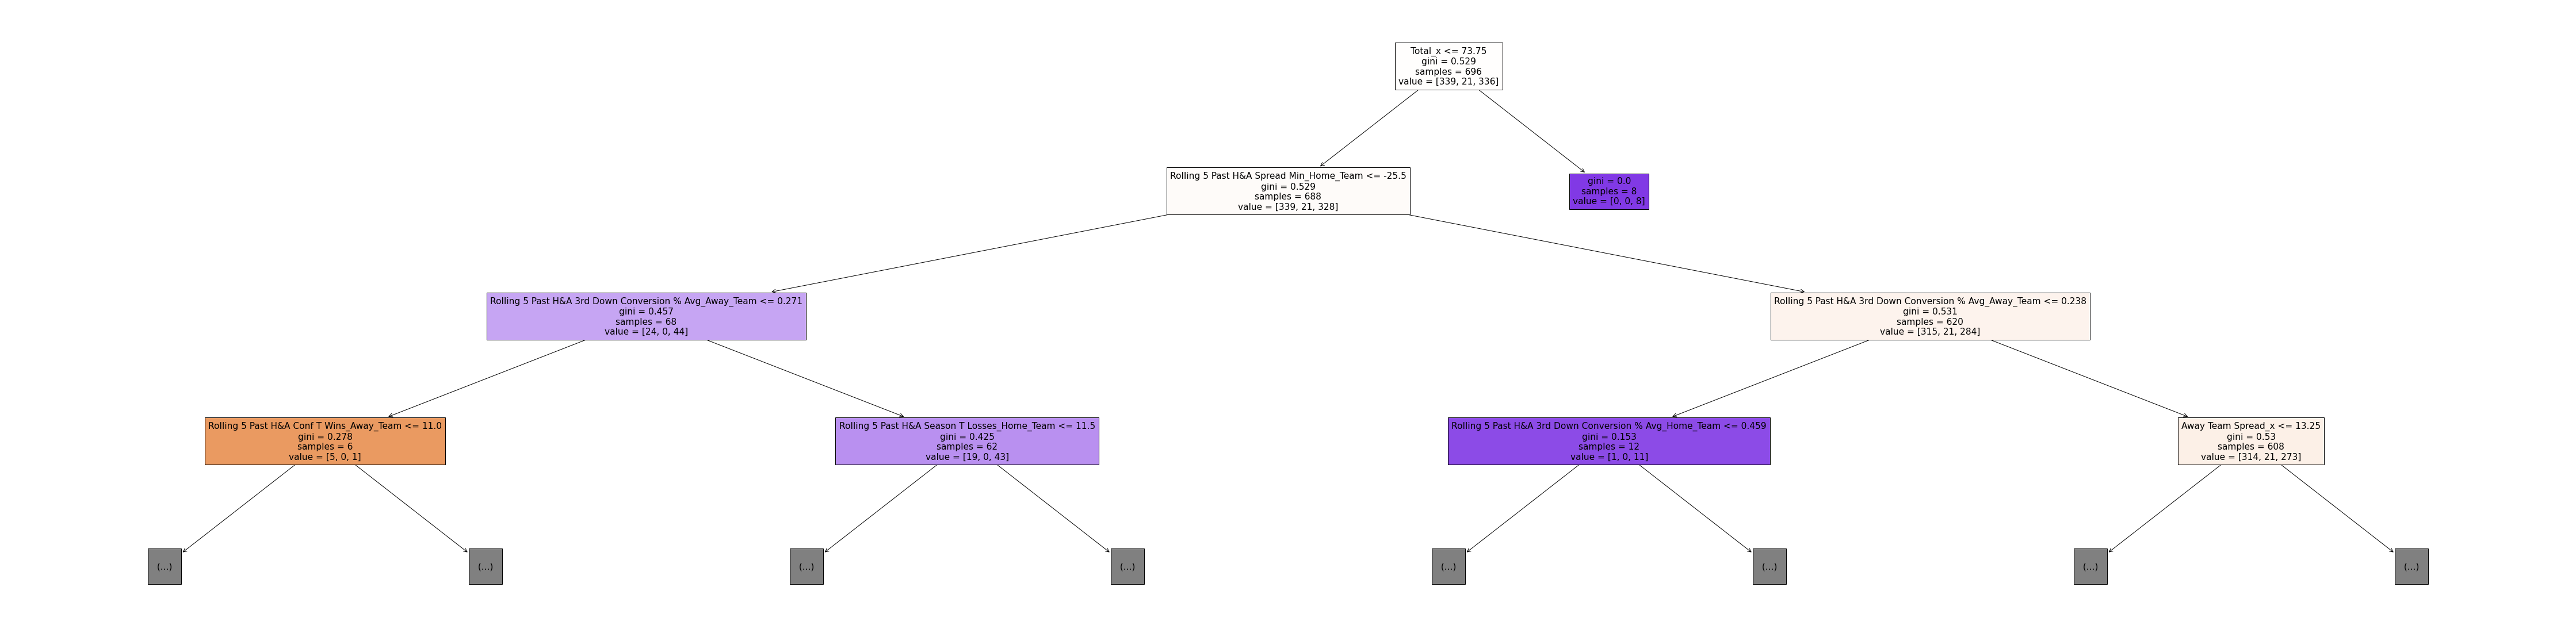

In [319]:
plt.figure(figsize=(80,20))
plot_tree(DT,feature_names=X_train.columns,max_depth=3,filled=True)

In [323]:
DT.feature_importances_

array([0.00990804, 0.04585716, 0.06854171, 0.01735833, 0.05760337,
       0.13498032, 0.06713964, 0.01903211, 0.03591368, 0.01956536,
       0.02076544, 0.04088066, 0.02612972, 0.02523618, 0.01227972,
       0.        , 0.03620032, 0.05438299, 0.00743109, 0.01901694,
       0.03371929, 0.        , 0.02555042, 0.00717286, 0.04016421,
       0.03839204, 0.0343791 , 0.        , 0.0759915 , 0.0206695 ,
       0.00573829, 0.        , 0.        ])

In [324]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

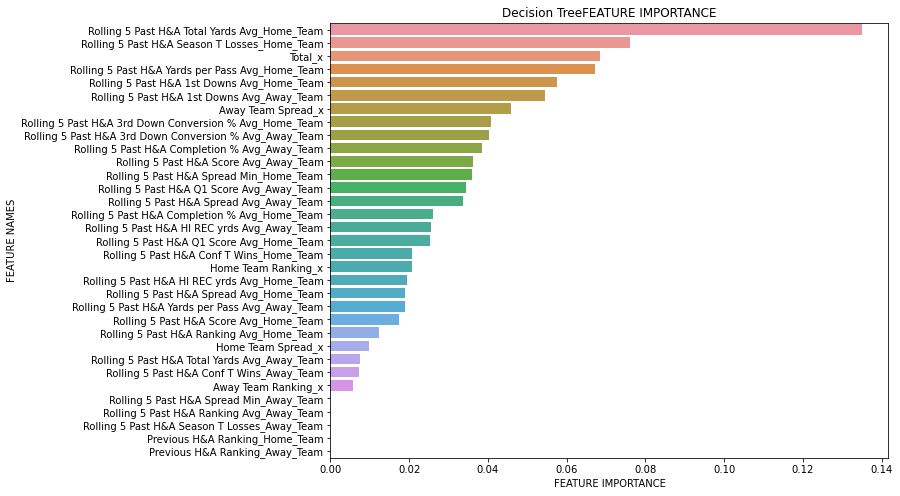

In [325]:
plot_feature_importance(DT.feature_importances_,X_train.columns,'Decision Tree')

In [326]:
X.columns

Index(['Home Team Spread_x', 'Away Team Spread_x', 'Total_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
       'Rolling 5 Past 

In [327]:
Home_Cols = [col for col in X.columns if 'Home' in col]

In [328]:
Home_Cols

['Home Team Spread_x',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team',
 'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
 'Rolling 5 Past H&A Conf T Wins_Home_Team',
 'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
 'Rolling 5 Past H&A Completion % Avg_Home_Team',
 'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
 'Rolling 5 Past H&A Ranking Avg_Home_Team',
 'Rolling 5 Past H&A Season T Losses_Home_Team',
 'Home Team Ranking_x',
 'Previous H&A Ranking_Home_Team']

In [329]:
X = df4[Home_Cols]

# Create constants for X, so the model knows its bounds
y = df4['H Spread Outcome']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [330]:
DT = DecisionTreeClassifier(criterion = 'gini', max_depth=13,random_state=42)

In [331]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=13, random_state=42)

In [332]:
y_pred=DT.predict(X_test)

In [333]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

   H_Spread_L      0.545     0.600     0.571       120
H_Spread_Push      0.000     0.000     0.000         6
   H_Spread_W      0.521     0.472     0.495       106

     accuracy                          0.526       232
    macro avg      0.355     0.357     0.355       232
 weighted avg      0.520     0.526     0.522       232



In [348]:
Home_Cols.append('Total_x')
X = df4[Home_Cols]

# Create constants for X, so the model knows its bounds
y = df4['H Spread Outcome']


# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [349]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],
    'min_samples_split': [2,3,5],
    'min_samples_leaf':[1,3,5,10],
    'max_features': [1,5,10,15]
}

In [350]:
DT = DecisionTreeClassifier()

In [351]:
clf = GridSearchCV(DT,parameters,cv=5)
clf.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26],
                         'max_features': [1, 5, 10, 15],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'min_samples_split': [2, 3, 5],
                         'splitter': ['best', 'random']})

In [352]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'max_features': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'splitter': 'best'}

In [353]:
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth=18,max_features=10,min_samples_leaf=10,min_samples_split=2,splitter='best',random_state=42)



In [354]:

X = df4[Home_Cols]

# Create constants for X, so the model knows its bounds
y = df4['H Spread Outcome']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [355]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features=10,
                       min_samples_leaf=10, random_state=42)

In [356]:
y_pred=DT.predict(X_test)

In [357]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

   H_Spread_L      0.511     0.592     0.548       120
H_Spread_Push      0.000     0.000     0.000         6
   H_Spread_W      0.462     0.406     0.432       106

     accuracy                          0.491       232
    macro avg      0.324     0.332     0.327       232
 weighted avg      0.475     0.491     0.481       232



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [364]:
Away_Cols = [col for col in df4.columns if 'Away' in col]
Away_Cols

['Away Team Spread_x',
 'Rolling 5 Past H&A Season T Losses_Away_Team',
 'Rolling 5 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
 'Rolling 5 Past H&A Total Yards Avg_Away_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
 'Rolling 5 Past H&A Spread Avg_Away_Team',
 'Rolling 5 Past H&A Spread Min_Away_Team',
 'Rolling 5 Past H&A HI REC yrds Avg_Away_Team',
 'Rolling 5 Past H&A Conf T Wins_Away_Team',
 'Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team',
 'Rolling 5 Past H&A Completion % Avg_Away_Team',
 'Rolling 5 Past H&A Q1 Score Avg_Away_Team',
 'Rolling 5 Past H&A Ranking Avg_Away_Team',
 'Away Team Ranking_x',
 'Previous H&A Ranking_Away_Team']

In [365]:
X = df4[Away_Cols]

# Create constants for X, so the model knows its bounds
y = df4['H Spread Outcome']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [366]:
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth=18,max_features=10,min_samples_leaf=10,min_samples_split=2,splitter='best',random_state=42)


In [367]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features=10,
                       min_samples_leaf=10, random_state=42)

In [368]:
y_pred=DT.predict(X_test)

In [369]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

   H_Spread_L      0.500     0.508     0.504       120
H_Spread_Push      0.000     0.000     0.000         6
   H_Spread_W      0.455     0.472     0.463       106

     accuracy                          0.478       232
    macro avg      0.318     0.327     0.322       232
 weighted avg      0.466     0.478     0.472       232



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [370]:
parameters = {
    
    'n_estimators': [50,100,150],
    'criterion': ['entropy','gini'],
    'max_depth': [10,30,50],
    'min_samples_split':[5,10,15],
    'min_samples_leaf': [3,10,20],
    'max_leaf_nodes': [20,30,50]
    
}

In [372]:
RF = RandomForestClassifier()

In [373]:
clf = GridSearchCV(RF,parameters,cv=5)
clf.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 30, 50],
                         'max_leaf_nodes': [20, 30, 50],
                         'min_samples_leaf': [3, 10, 20],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [50, 100, 150]})

In [379]:
best_param= clf.best_params_

In [381]:
best_param

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 50}

In [375]:
X = df4[Away_Cols]

# Create constants for X, so the model knows its bounds
y = df4['H Spread Outcome']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [377]:
RF = RandomForestClassifier()

In [382]:
RF.set_params(**best_param)

RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=50,
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=50)

In [383]:
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=50,
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=50)

In [384]:
y_pred=RF.predict(X_test)

In [385]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

   H_Spread_L      0.518     0.492     0.504       120
H_Spread_Push      0.000     0.000     0.000         6
   H_Spread_W      0.441     0.491     0.464       106

     accuracy                          0.478       232
    macro avg      0.319     0.327     0.323       232
 weighted avg      0.469     0.478     0.473       232



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [386]:
best_param

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 50}

In [387]:
parameters = {
    
    'n_estimators': [50,100,150],
    'max_depth': [2,3,10,15],
    'min_samples_split':[2,3,5],
    'min_samples_leaf': [1,3,5],
    'max_leaf_nodes': [30,50,70]
    
}

In [404]:
df4.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass Avg_Home_Team,Rolling 5 Past H&A Spread Avg_Home_Team,Rolling 5 Past H&A Spread Min_Home_Team,Rolling 5 Past H&A HI REC yrds Avg_Home_Team,...,Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team,Rolling 5 Past H&A Completion % Avg_Away_Team,Rolling 5 Past H&A Q1 Score Avg_Away_Team,Rolling 5 Past H&A Ranking Avg_Away_Team,Rolling 5 Past H&A Season T Losses_Home_Team,Home Team Ranking_x,Away Team Ranking_x,Previous H&A Ranking_Home_Team,Previous H&A Ranking_Away_Team,H Spread Outcome
1,6.5,-6.5,49.0,37.4,23.6,496.8,9.86,-22.3,-29.0,148.0,...,0.395177,0.629171,3.4,1.2,5.0,3,1,3.0,1.0,H_Spread_W
2,6.5,-6.5,27.0,22.8,20.0,358.2,6.18,11.1,2.0,59.0,...,0.319011,0.549526,11.0,32.4,21.0,99,15,99.0,11.0,H_Spread_W
3,19.5,-19.5,55.5,24.6,22.2,399.6,7.70,-1.3,-7.0,85.6,...,0.565366,0.688440,6.2,2.6,16.0,99,3,99.0,1.0,H_Spread_W
4,31.5,-31.5,63.5,17.6,16.2,313.8,6.28,22.5,16.0,85.0,...,0.442828,0.682678,15.0,99.0,35.0,99,99,99.0,99.0,H_Spread_W
5,-14.5,14.5,63.0,31.2,25.0,456.0,8.08,2.8,-4.5,105.4,...,0.347843,0.662846,3.2,99.0,15.0,25,99,21.0,99.0,H_Spread_W


In [420]:
X= df4.drop('H Spread Outcome',axis=1)
y= df4['H Spread Outcome']

In [421]:
RF = RandomForestClassifier()

In [408]:
clf = GridSearchCV(RF,parameters,scoring = 'accuracy', cv=5)
clf.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 10, 15],
                         'max_leaf_nodes': [30, 50, 70],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [409]:
best_param= clf.best_params_

In [410]:
best_param

{'max_depth': 2,
 'max_leaf_nodes': 70,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [422]:
X = X

# Create constants for X, so the model knows its bounds
y = y


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [423]:
RF = RandomForestClassifier()

In [413]:
RF.set_params(**best_param)

RandomForestClassifier(max_depth=2, max_leaf_nodes=70, min_samples_leaf=3,
                       min_samples_split=3)

In [424]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [425]:
y_pred=RF.predict(X_test)

In [426]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

   H_Spread_L      0.571     0.633     0.601       120
H_Spread_Push      0.000     0.000     0.000         6
   H_Spread_W      0.495     0.462     0.478       106

     accuracy                          0.539       232
    macro avg      0.355     0.365     0.360       232
 weighted avg      0.522     0.539     0.529       232



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [430]:
RF.n_features_in_

33

In [432]:
RF.n_outputs_

1

In [433]:
RF.n_classes_

3

In [438]:
len(RF.estimators_)

100

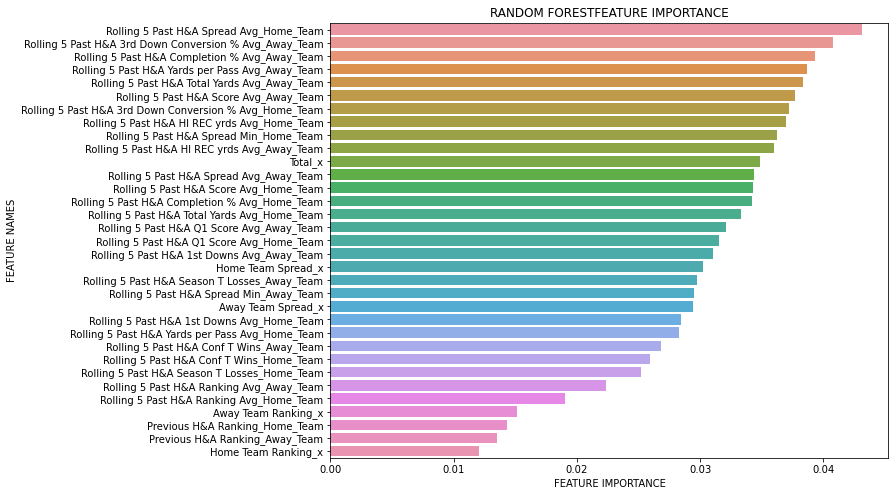

In [427]:
plot_feature_importance(RF.feature_importances_,X_train.columns,'RANDOM FOREST')

In [447]:
X.columns

Index(['Home Team Spread_x', 'Away Team Spread_x', 'Total_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
       'Rolling 5 Past 

# Ran another RF model without the ranking data included to compare results 

In [445]:
X_new = X

In [452]:

X_new.drop('Home Team Ranking_x',axis=1,inplace=True)
X_new.drop('Away Team Ranking_x',axis=1,inplace=True)
X_new.drop('Previous H&A Ranking_Home_Team',inplace=True,axis=1)
X_new.drop('Previous H&A Ranking_Away_Team',inplace=True,axis=1)

In [456]:
X_new.columns

Index(['Home Team Spread_x', 'Away Team Spread_x', 'Total_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
       'Rolling 5 Past 

In [457]:
#X = 

# Create constants for X, so the model knows its bounds
#y = y


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 42)

In [458]:
RF = RandomForestClassifier()

In [459]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [460]:
y_pred = RF.predict(X_test)

In [461]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

   H_Spread_L      0.495     0.458     0.476       120
H_Spread_Push      0.000     0.000     0.000         6
   H_Spread_W      0.430     0.491     0.458       106

     accuracy                          0.461       232
    macro avg      0.308     0.316     0.311       232
 weighted avg      0.453     0.461     0.456       232



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [463]:
X['Home Team'] = df3['Home Team']
X['Away Team'] = df3['Away Team']

In [468]:
X = pd.get_dummies(X,columns=['Home Team'],drop_first=True)

In [470]:
X= pd.get_dummies(X,columns=['Away Team'],drop_first=True)

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 42)

In [472]:
RF = RandomForestClassifier()

In [473]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [474]:
y_pred = RF.predict(X_test)

In [475]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

   H_Spread_L      0.569     0.550     0.559       120
H_Spread_Push      0.000     0.000     0.000         6
   H_Spread_W      0.500     0.547     0.523       106

     accuracy                          0.534       232
    macro avg      0.356     0.366     0.361       232
 weighted avg      0.523     0.534     0.528       232



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [476]:
RF.n_features_in_

29

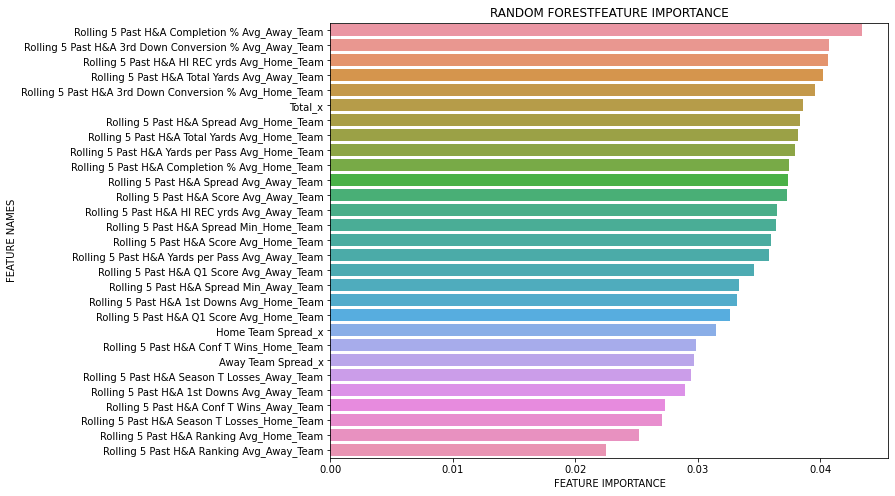

In [477]:
plot_feature_importance(RF.feature_importances_,X_train.columns,'RANDOM FOREST')

In [479]:
Home_Team_Cols = [col for col in X.columns if 'Home Team' in col]

In [480]:
X.drop(Home_Team_Cols,axis=1,inplace=True)

In [503]:
X = df4

In [504]:
X.columns

Index(['Home Team Spread_x', 'Away Team Spread_x', 'Total_x', 'Home Score_x_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team', 'Away Score_x_x',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg

In [505]:
X.drop('Year',inplace=True,axis=1)
y= X['H Spread Outcome']
X.drop('H Spread Outcome',inplace=True,axis=1)



<ipython-input-505-e59e933ec043>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Year',inplace=True,axis=1)
<ipython-input-505-e59e933ec043>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('H Spread Outcome',inplace=True,axis=1)


In [506]:
X.drop('Date',inplace=True,axis=1)
X.drop('Home Team',inplace=True,axis=1)

<ipython-input-506-6f425fce10be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Date',inplace=True,axis=1)
<ipython-input-506-6f425fce10be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Home Team',inplace=True,axis=1)


In [507]:
X.drop('Home Score_x_x',inplace=True,axis=1)
X.drop('Away Score_x_x',inplace=True,axis=1)

<ipython-input-507-92b6e1ccb119>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Home Score_x_x',inplace=True,axis=1)
<ipython-input-507-92b6e1ccb119>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Away Score_x_x',inplace=True,axis=1)


In [508]:
X.columns

Index(['Home Team Spread_x', 'Away Team Spread_x', 'Total_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
       'Rolling 5 Past 

In [509]:
X= pd.get_dummies(X,columns=['Away Team'],drop_first=True)

In [510]:
X.columns

Index(['Home Team Spread_x', 'Away Team Spread_x', 'Total_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
       'Rolling 5 Past 

In [511]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [512]:
RF = RandomForestClassifier()

In [513]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [514]:
y_pred = RF.predict(X_test)

In [515]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

   H_Spread_L      0.524     0.550     0.537       120
H_Spread_Push      0.000     0.000     0.000         6
   H_Spread_W      0.462     0.462     0.462       106

     accuracy                          0.496       232
    macro avg      0.329     0.337     0.333       232
 weighted avg      0.482     0.496     0.489       232



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [520]:
X= df4

In [521]:
X.columns

Index(['Home Team Spread_x', 'Away Team Spread_x', 'Total_x', 'Home Score_x_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team', 'Away Score_x_x',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg

In [522]:
X.drop('Home Score_x_x',inplace=True,axis=1)
X.drop('Away Score_x_x',inplace=True,axis=1)
X.drop('Year',inplace=True,axis=1)
y= X['H Spread Outcome']
X.drop('H Spread Outcome',inplace=True,axis=1)
X.drop('Date',inplace=True,axis=1)

<ipython-input-522-1d8c30b40e1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Home Score_x_x',inplace=True,axis=1)
<ipython-input-522-1d8c30b40e1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Away Score_x_x',inplace=True,axis=1)
<ipython-input-522-1d8c30b40e1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Year',inplace=True,axis=1)
<ipython-input-522-1d8c30b40e1b>:5: SettingWithCopyWarning: 
A value

In [535]:
X.columns

Index(['Home Team Spread_x', 'Away Team Spread_x', 'Total_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
       'Rolling 5 Past 

In [607]:
X= df4

In [608]:
X_new = X[['Rolling 5 Past H&A Spread Avg_Away_Team',
           'Rolling 5 Past H&A Spread Avg_Home_Team',
           'Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team',
           'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
          'Rolling 5 Past H&A Total Yards Avg_Away_Team',
          'Rolling 5 Past H&A Total Yards Avg_Home_Team',
          'H Spread Outcome',
         'Rolling 5 Past H&A Score Avg_Away_Team',
         'Rolling 5 Past H&A Score Avg_Home_Team',
          'Home Team Spread_x']]




In [613]:
X_new2= X
X_new2['Rolling_Spread_Diff']= X['Rolling 5 Past H&A Spread Avg_Away_Team'] - X['Rolling 5 Past H&A Spread Avg_Home_Team']
X_new2['Rolling_3rd_Diff']= X['Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team'] - X['Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team']
X_new2['Rolling_Yards_Diff']= X['Rolling 5 Past H&A Total Yards Avg_Away_Team'] - X['Rolling 5 Past H&A Total Yards Avg_Home_Team']  
X_new2['Rolling_Yards_Diff']= X['Rolling 5 Past H&A Score Avg_Away_Team'] - X['Rolling 5 Past H&A Score Avg_Home_Team']  
X_new2['Home Team Spread_x'] = X['Home Team Spread_x']
X_new2['Total_x'] = X['Total_x']



<ipython-input-613-d44f8c480f48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new2['Rolling_Spread_Diff']= X['Rolling 5 Past H&A Spread Avg_Away_Team'] - X['Rolling 5 Past H&A Spread Avg_Home_Team']
<ipython-input-613-d44f8c480f48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new2['Rolling_3rd_Diff']= X['Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team'] - X['Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team']
<ipython-input-613-d44f8c480f48>:4: SettingWithCopyWarning: 
A value is try

In [614]:
X_new2 = X_new2[['Total_x','Home Team Spread_x','Rolling_Yards_Diff','Rolling_Yards_Diff','Rolling_3rd_Diff','Rolling_Spread_Diff','H Spread Outcome']]

In [615]:
y=X_new2['H Spread Outcome']
X=X_new2.drop('H Spread Outcome',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [616]:
RF = RandomForestClassifier()

In [617]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [618]:
y_pred = RF.predict(X_test)

In [619]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

   H_Spread_L      0.486     0.425     0.453       120
H_Spread_Push      0.000     0.000     0.000         6
   H_Spread_W      0.425     0.509     0.464       106

     accuracy                          0.453       232
    macro avg      0.304     0.311     0.306       232
 weighted avg      0.446     0.453     0.446       232



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [620]:
X.columns

Index(['Total_x', 'Home Team Spread_x', 'Rolling_Yards_Diff',
       'Rolling_Yards_Diff', 'Rolling_3rd_Diff', 'Rolling_Spread_Diff'],
      dtype='object')

In [627]:
DT = DecisionTreeClassifier()

In [628]:
scaler=StandardScaler()

In [630]:
scaler.DT.fit(X_train,y_train)

AttributeError: 'StandardScaler' object has no attribute 'DT'

In [623]:
y_pred = DT.predict(X_test)

In [624]:
y_pred = DT.predict(X_test)

In [625]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

   H_Spread_L      0.491     0.450     0.470       120
H_Spread_Push      0.000     0.000     0.000         6
   H_Spread_W      0.462     0.462     0.462       106

     accuracy                          0.444       232
    macro avg      0.318     0.304     0.311       232
 weighted avg      0.465     0.444     0.454       232



In [626]:
X_new2

,Total_x,Home Team Spread_x,Rolling_Yards_Diff,Rolling_Yards_Diff,Rolling_3rd_Diff,Rolling_Spread_Diff,H Spread Outcome
1,49.0,6.5,-1.0,-1.0,-0.148180,0.4,H_Spread_W
2,27.0,6.5,9.0,9.0,-0.046545,-14.8,H_Spread_W
3,55.5,19.5,15.6,15.6,0.176925,-20.8,H_Spread_W
4,63.5,31.5,13.8,13.8,0.123914,-15.7,H_Spread_W
5,63.0,-14.5,-8.8,-8.8,-0.082420,6.4,H_Spread_W
...,...,...,...,...,...,...,...
941,54.0,10.5,14.2,14.2,0.089809,-17.8,H_Spread_L
942,44.5,24.0,19.8,19.8,0.129804,-24.2,H_Spread_L
943,42.5,-17.0,-2.4,-2.4,0.023818,17.5,H_Spread_L
946,38.5,-1.0,-2.0,-2.0,0.000208,3.0,H_Spread_L


In [631]:
from sklearn.neighbors import KNeighborsClassifier

In [668]:
KNN = KNeighborsClassifier(n_neighbors=40)

In [669]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [670]:
y_pred= KNN.predict(X_test)

In [672]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

   H_Spread_L      0.553     0.650     0.598       120
H_Spread_Push      0.000     0.000     0.000         6
   H_Spread_W      0.495     0.425     0.457       106

     accuracy                          0.530       232
    macro avg      0.349     0.358     0.352       232
 weighted avg      0.512     0.530     0.518       232



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [727]:
X= df4 
X.columns

Index(['Home Team Spread_x', 'Away Team Spread_x', 'Total_x', 'Home Score_x_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team', 'Away Score_x_x',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg

In [728]:
X['Home_Spread_Outcome_NoPush'] = X.apply(lambda x: 'H_Spread_Win' if (x['H Spread Outcome'] == 'H_Spread_W') or (x['H Spread Outcome'] =='H_Spread_Push') else ('H_Spread_Loss'),axis=1)
                                          
                                          
                                          
                                          

<ipython-input-728-37748f4ccb0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Home_Spread_Outcome_NoPush'] = X.apply(lambda x: 'H_Spread_Win' if (x['H Spread Outcome'] == 'H_Spread_W') or (x['H Spread Outcome'] =='H_Spread_Push') else ('H_Spread_Loss'),axis=1)


In [736]:
X.drop('Home Score_x_x',inplace=True,axis=1)
X.drop('Away Score_x_x',inplace=True,axis=1)
X.drop('Year',inplace=True,axis=1)
y= X['Home_Spread_Outcome_NoPush']
X.drop('H Spread Outcome',inplace=True,axis=1)
X.drop('Home_Spread_Outcome_NoPush',inplace=True,axis=1)
X.drop('Date',inplace=True,axis=1)
X.drop('Home Team',inplace=True,axis=1)
X.drop('Away Team',inplace=True,axis=1)

<ipython-input-736-cffc509d2686>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Home Score_x_x',inplace=True,axis=1)
<ipython-input-736-cffc509d2686>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Away Score_x_x',inplace=True,axis=1)
<ipython-input-736-cffc509d2686>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Year',inplace=True,axis=1)
<ipython-input-736-cffc509d2686>:5: SettingWithCopyWarning: 
A value

In [737]:
X.columns

Index(['Home Team Spread_x', 'Away Team Spread_x', 'Total_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
       'Rolling 5 Past 

In [873]:
parameters = {
    'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,30,31,33,35,37,39,40,41,42,43,44,45,46,47,48,49,50]
    
}

In [910]:
KNN = KNeighborsClassifier()

In [912]:
clf = GridSearchCV(KNN,parameters,cv=5,scoring='balanced_accuracy')
clf.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 30, 31, 33, 35, 37, 39,
                                         40, 41, 42, 43, 44, 45, 46, 47, 48, ...]},
             scoring='balanced_accuracy')

In [913]:
best_param= clf.best_params_

In [914]:
best_param

{'n_neighbors': 35}

In [915]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [920]:
KNN = KNeighborsClassifier(n_neighbors=50)

In [921]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [922]:
y_pred=KNN.predict(X_test)

In [923]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

H_Spread_Loss      0.581     0.600     0.590       120
 H_Spread_Win      0.556     0.536     0.545       112

     accuracy                          0.569       232
    macro avg      0.568     0.568     0.568       232
 weighted avg      0.569     0.569     0.569       232



In [816]:
from sklearn import svm

In [744]:
clf = svm.SVC(decision_function_shape='ovo')

In [745]:
clf.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [746]:
y_pred = clf.predict(X_test)


In [747]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

H_Spread_Loss      0.510     0.408     0.454       120
 H_Spread_Win      0.478     0.580     0.524       112

     accuracy                          0.491       232
    macro avg      0.494     0.494     0.489       232
 weighted avg      0.495     0.491     0.488       232



In [748]:
DT = DecisionTreeClassifier()

In [749]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [750]:
y_pred=DT.predict(X_test)

In [751]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

H_Spread_Loss      0.461     0.442     0.451       120
 H_Spread_Win      0.427     0.446     0.437       112

     accuracy                          0.444       232
    macro avg      0.444     0.444     0.444       232
 weighted avg      0.445     0.444     0.444       232



In [752]:
RF = RandomForestClassifier()

In [753]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [754]:
y_pred=RF.predict(X_test)

In [755]:
print(metrics.classification_report(y_test, y_pred, digits=3))

               precision    recall  f1-score   support

H_Spread_Loss      0.470     0.458     0.464       120
 H_Spread_Win      0.435     0.446     0.441       112

     accuracy                          0.453       232
    macro avg      0.452     0.452     0.452       232
 weighted avg      0.453     0.453     0.453       232

